<a href="https://colab.research.google.com/github/Qianru69/Wind-Prediction/blob/Add-EDA-%26-Chicago-model/LSTM_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Notebook for creating and training LSTM Machine Learning Model for the Chicago Area

In this notebook, we will load up the relevant datasets and create a Pytorch ML model that will predict wind speed at a specified location given historical data.

We connect to Google Drive and load up our previously saved data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS 663 - Project/Chicago_Wind_Data.csv')
df

,time,latitude,longitude,number,step,surface,valid_time,East_Wind_10m,North_Wind_10m,Temperature_2m,...,Neutral_Wind_Speed_10,Wind_Dir_100,Wind_Dir_10,Neutral_Wind_Dir_10,Wind_Dir_100_Sin,Wind_Dir_100_Cos,Wind_Dir_10_Sin,Wind_Dir_10_Cos,Neutral_Wind_Dir_10_Sin,Neutral_Wind_Dir_10_Cos
0,2023-01-01 00:00:00,42.0,-88.00,0,0 days,0.0,2023-01-01 00:00:00,-2.124207,0.640182,274.61362,...,1.780567,298.639040,286.771480,286.85052,-0.877657,0.479290,-0.957463,0.288555,-0.957064,0.289876
1,2023-01-01 00:00:00,42.0,-87.75,0,0 days,0.0,2023-01-01 00:00:00,-2.391785,0.497604,274.90463,...,2.122961,295.970120,281.752560,281.66473,-0.899022,0.437902,-0.979036,0.203686,-0.979347,0.202185
2,2023-01-01 00:00:00,42.0,-87.50,0,0 days,0.0,2023-01-01 00:00:00,-2.976746,0.578659,275.03160,...,3.129413,296.609340,281.000700,280.96503,-0.894081,0.447905,-0.981625,0.190821,-0.981743,0.190210
3,2023-01-01 00:00:00,42.0,-87.25,0,0 days,0.0,2023-01-01 00:00:00,-2.198425,0.725143,275.18588,...,2.494800,303.024600,288.254970,288.54540,-0.838437,0.544999,-0.949672,0.313246,-0.948072,0.318056
4,2023-01-01 00:00:00,42.0,-87.00,0,0 days,0.0,2023-01-01 00:00:00,-1.292175,0.754440,275.20932,...,1.695336,316.080200,300.278630,300.93890,-0.693651,0.720311,-0.863584,0.504205,-0.857716,0.514124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218995,2023-12-31 23:00:00,41.0,-88.00,0,0 days,0.0,2023-12-31 23:00:00,3.796341,-0.884415,273.55444,...,3.813947,107.538760,103.114010,103.11325,0.953513,-0.301351,0.973920,-0.226890,0.973924,-0.226877
218996,2023-12-31 23:00:00,41.0,-87.75,0,0 days,0.0,2023-12-31 23:00:00,4.077591,-0.684219,273.49390,...,4.056500,102.862240,99.525480,99.52069,0.974908,-0.222608,0.986212,-0.165486,0.986226,-0.165404
218997,2023-12-31 23:00:00,41.0,-87.50,0,0 days,0.0,2023-12-31 23:00:00,4.402786,-0.508438,273.37476,...,4.362501,99.670135,96.587400,96.59503,0.985791,-0.167976,0.993398,-0.114719,0.993383,-0.114851
218998,2023-12-31 23:00:00,41.0,-87.25,0,0 days,0.0,2023-12-31 23:00:00,4.733841,-0.526016,273.33180,...,4.705184,99.189390,96.340610,96.34009,0.987166,-0.159698,0.993883,-0.110439,0.993884,-0.110430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219000 entries, 0 to 218999
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   time                     219000 non-null  object 
 1   latitude                 219000 non-null  float64
 2   longitude                219000 non-null  float64
 3   number                   219000 non-null  int64  
 4   step                     219000 non-null  object 
 5   surface                  219000 non-null  float64
 6   valid_time               219000 non-null  object 
 7   East_Wind_10m            219000 non-null  float64
 8   North_Wind_10m           219000 non-null  float64
 9   Temperature_2m           219000 non-null  float64
 10  East_Neutral_Wind_10m    219000 non-null  float64
 11  North_Neutral_Wind_10m   219000 non-null  float64
 12  East_Wind_100m           219000 non-null  float64
 13  North_Wind_100m          219000 non-null  float64
 14  Wind

In [ ]:
simp_df = df.loc[:,["time", "latitude", "longitude", "Wind_Speed_100", "Wind_Dir_100_Sin", "Wind_Dir_100_Cos" ]]
simp_df

,time,latitude,longitude,Wind_Speed_100,Wind_Dir_100_Sin,Wind_Dir_100_Cos
0,2023-01-01 00:00:00,42.0,-88.00,4.948945,-0.877657,0.479290
1,2023-01-01 00:00:00,42.0,-87.75,4.328398,-0.899022,0.437902
2,2023-01-01 00:00:00,42.0,-87.50,3.442473,-0.894081,0.447905
3,2023-01-01 00:00:00,42.0,-87.25,2.488726,-0.838437,0.544999
4,2023-01-01 00:00:00,42.0,-87.00,1.728455,-0.693651,0.720311
...,...,...,...,...,...,...
218995,2023-12-31 23:00:00,41.0,-88.00,6.389079,0.953513,-0.301351
218996,2023-12-31 23:00:00,41.0,-87.75,6.670582,0.974908,-0.222608
218997,2023-12-31 23:00:00,41.0,-87.50,7.130893,0.985791,-0.167976
218998,2023-12-31 23:00:00,41.0,-87.25,7.579979,0.987166,-0.159698


In [ ]:
#simp_df_pivot_table = pd.pivot_table(simp_df, columns=["latitude","longitude"], index="time", values="Wind_Speed_100")
simp_df_pivot_table = pd.pivot_table(simp_df, columns=["latitude","longitude"], index="time", values=["Wind_Speed_100", "Wind_Dir_100_Sin", "Wind_Dir_100_Cos"])
simp_df_pivot_table

Wind_Dir_100_Cos                                          \
latitude                       41.00                                           
longitude                     -88.00    -87.75    -87.50    -87.25    -87.00   
time                                                                           
2023-01-01 00:00:00         0.856126  0.842091  0.814643  0.799862  0.783519   
2023-01-01 01:00:00         0.893162  0.892174  0.889204  0.880093  0.869832   
2023-01-01 02:00:00         0.907107  0.909313  0.916910  0.918686  0.911917   
2023-01-01 03:00:00         0.956855  0.949553  0.947077  0.945446  0.942495   
2023-01-01 04:00:00         0.996299  0.993259  0.990002  0.983377  0.974347   
...                              ...       ...       ...       ...       ...   
2023-12-31 19:00:00        -0.381662 -0.358230 -0.323013 -0.260461 -0.199629   
2023-12-31 20:00:00        -0.435672 -0.420050 -0.406739 -0.367378 -0.325876   
2023-12-31 21:00:00        -0.469057 -0.450706 -0.435314 -0.419017 -0.378853   
2023-12-31 22:00:00        -0.347233 -0.362794 -0.388243 -0.374293 -0.307068   
2023-12-31 23:00:00        -0.301351 -0.222608 -0.167976 -0.159698 -0.136209   

                                                                       ...  \
latitude                41.25                                          ...   
longitude              -88.00    -87.75    -87.50    -87.25    -87.00  ...   
time                                                                   ...   
2023-01-01 00:00:00  0.840401  0.802390  0.762882  0.741338  0.764274  ...   
2023-01-01 01:00:00  0.854809  0.866595  0.864519  0.852054  0.841361  ...   
2023-01-01 02:00:00  0.859502  0.880394  0.892546  0.894526  0.892920  ...   
2023-01-01 03:00:00  0.923420  0.924657  0.922660  0.918428  0.914055  ...   
2023-01-01 04:00:00  0.983402  0.981624  0.975990  0.963849  0.950464  ...   
...                       ...       ...       ...       ...       ...  ...   
2023-12-31 19:00:00 -0.425661 -0.426395 -0.391391 -0.321269 -0.204971  ...   
2023-12-31 20:00:00 -0.475122 -0.489045 -0.484431 -0.440919 -0.357602  ...   
2023-12-31 21:00:00 -0.503459 -0.507238 -0.506782 -0.494541 -0.465770  ...   
2023-12-31 22:00:00 -0.409444 -0.345411 -0.348778 -0.358130 -0.365164  ...   
2023-12-31 23:00:00 -0.427885 -0.293205 -0.211206 -0.203662 -0.203543  ...   

                    Wind_Speed_100                                            \
latitude                     41.75                                             
longitude                   -88.00    -87.75    -87.50     -87.25     -87.00   
time                                                                           
2023-01-01 00:00:00       4.639541  4.271622  3.686235   2.914870   2.163213   
2023-01-01 01:00:00       5.694444  5.440902  5.231613   4.768841   4.152225   
2023-01-01 02:00:00       6.994053  6.807307  6.796641   6.557477   6.135524   
2023-01-01 03:00:00       6.960771  7.173604  7.595743   7.535075   7.137762   
2023-01-01 04:00:00       7.019574  7.359828  8.033144   8.194159   7.912636   
...                            ...       ...       ...        ...        ...   
2023-12-31 19:00:00       5.900487  6.621889  7.919113   7.911905   7.033661   
2023-12-31 20:00:00       5.417683  6.194251  7.864306   8.647323   8.185345   
2023-12-31 21:00:00       5.053786  5.800386  7.486168   8.875520   8.956122   
2023-12-31 22:00:00       4.803372  5.401699  7.393619   9.007161   9.171047   
2023-12-31 23:00:00       6.617671  7.369817  9.695168  10.779204  10.287777   

                                                                          
latitude                42.00                                             
longitude              -88.00    -87.75     -87.50     -87.25     -87.00  
time                                                                      
2023-01-01 00:00:00  4.948945  4.328398   3.442473   2.488726   1.728455  
2023-01-01 01:00:00  5.185219  4.854425   4.607606   3.972889   3.226752

In [ ]:
simp_df_pivot_table.head()

Wind_Dir_100_Cos                                          \
latitude                       41.00                                           
longitude                     -88.00    -87.75    -87.50    -87.25    -87.00   
time                                                                           
2023-01-01 00:00:00         0.856126  0.842091  0.814643  0.799862  0.783519   
2023-01-01 01:00:00         0.893162  0.892174  0.889204  0.880093  0.869832   
2023-01-01 02:00:00         0.907107  0.909313  0.916910  0.918686  0.911917   
2023-01-01 03:00:00         0.956855  0.949553  0.947077  0.945446  0.942495   
2023-01-01 04:00:00         0.996299  0.993259  0.990002  0.983377  0.974347   

                                                                       ...  \
latitude                41.25                                          ...   
longitude              -88.00    -87.75    -87.50    -87.25    -87.00  ...   
time                                                                   ...   
2023-01-01 00:00:00  0.840401  0.802390  0.762882  0.741338  0.764274  ...   
2023-01-01 01:00:00  0.854809  0.866595  0.864519  0.852054  0.841361  ...   
2023-01-01 02:00:00  0.859502  0.880394  0.892546  0.894526  0.892920  ...   
2023-01-01 03:00:00  0.923420  0.924657  0.922660  0.918428  0.914055  ...   
2023-01-01 04:00:00  0.983402  0.981624  0.975990  0.963849  0.950464  ...   

                    Wind_Speed_100                                          \
latitude                     41.75                                           
longitude                   -88.00    -87.75    -87.50    -87.25    -87.00   
time                                                                         
2023-01-01 00:00:00       4.639541  4.271622  3.686235  2.914870  2.163213   
2023-01-01 01:00:00       5.694444  5.440902  5.231613  4.768841  4.152225   
2023-01-01 02:00:00       6.994053  6.807307  6.796641  6.557477  6.135524   
2023-01-01 03:00:00       6.960771  7.173604  7.595743  7.535075  7.137762   
2023-01-01 04:00:00       7.019574  7.359828  8.033144  8.194159  7.912636   

                                                                       
latitude                42.00                                          
longitude              -88.00    -87.75    -87.50    -87.25    -87.00  
time                                                                   
2023-01-01 00:00:00  4.948945  4.328398  3.442473  2.488726  1.728455  
2023-01-01 01:00:00  5.185219  4.854425  4.607606  3.972889  3.226752  
2023-01-01 02:00:00  6.665960  6.376718  6.216720  5.736917  5.188885  
2023-01-01 03:00:00  6.748290  7.006345  7.423897  7.154286  6.684862  
2023-01-01 04:00:00  6.844422  7.176743  7.875390  7.934486  7.625770  

[5 rows x 75 columns]

In [ ]:
simp_df_pivot_table.shape

(8760, 75)

In [ ]:
import numpy as np

# Number of features (channels) is the number of meteorological variables
#num_features = len(simp_df_pivot_table.columns.levels[2])  # Assuming level 2 is where variables are

# Reshape data to (time, latitude, longitude, features)
reshaped_data = simp_df_pivot_table.values.reshape(-1, 5, 5,3)
reshaped_data.shape

(8760, 5, 5, 3)

In [ ]:
# If using LSTM only model, run this
import numpy as np

# Function to create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]  # grab time t-5 to t-1
        y = data[i + seq_length]  # grab time t
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [ ]:
# Applying the function to your DataFrame
seq_length = 6  # Number of timepoints to use for prediction
features, targets = create_sequences(simp_df_pivot_table.values, seq_length)

In [ ]:
import numpy as np

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        # Extract the sequence of 'seq_length' frames
        x = data[i:(i + seq_length)]
        # Add a channel dimension: (seq_length, height, width, channels)
        y = data[i + seq_length][:, :, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Assuming 'simp_df_pivot_table.values' is a numpy array of shape (time, latitude*longitude)
# Reshape to (time, latitude, longitude)
channel_size = len(simp_df_pivot_table.columns.levels[0])
latitude_size = len(simp_df_pivot_table.columns.levels[1])
longitude_size = len(simp_df_pivot_table.columns.levels[2])
reshaped_data = simp_df_pivot_table.values.reshape(-1, channel_size, latitude_size, longitude_size)
print(reshaped_data.shape)
reshaped_data = np.transpose(reshaped_data, (0, 2, 3, 1))  # Adjust if necessary based on your dataframe's levels
print(reshaped_data.shape)

seq_length = 6  # Number of timepoints to use for prediction
features, targets = create_sequences(reshaped_data, seq_length)

(8760, 3, 5, 5)
(8760, 5, 5, 3)


In [ ]:
print(features.shape)
print(targets.shape)

(8754, 6, 5, 5, 3)
(8754, 5, 5)


In [ ]:
# Define split sizes
train_size = int(len(features) * 0.7)
val_size = int(len(features) * 0.15)

# Split data
train_x, train_y = features[:train_size], targets[:train_size]
valid_x, valid_y = features[train_size:train_size + val_size], targets[train_size:train_size + val_size]
test_x, test_y = features[train_size + val_size:], targets[train_size + val_size:]

In [ ]:
print(train_x.shape, train_y.shape)
print(valid_x.shape, valid_y.shape)
print(test_x.shape, test_y.shape)

(6127, 6, 5, 5, 3) (6127, 5, 5)
(1313, 6, 5, 5, 3) (1313, 5, 5)
(1314, 6, 5, 5, 3) (1314, 5, 5)


In [ ]:
import torch

# Convert features and targets into PyTorch tensors
features_tensor = torch.tensor(features).float()  # Convert features to tensor
features_tensor = features_tensor.permute(0, 1, 4, 2, 3)  # Reorder dimensions to match (batch, seq, channels, height, width)
targets_tensor = torch.tensor(targets).float()  # Convert targets to tensor


In [ ]:
import torch

# Conversion function
def to_tensor(numpy_array):
    return torch.tensor(numpy_array).float()

# Convert all splits to tensors
train_x = to_tensor(train_x)
train_x = train_x.permute(0, 1, 4, 2, 3)
train_y = to_tensor(train_y)
valid_x = to_tensor(valid_x)
valid_x = valid_x.permute(0, 1, 4, 2, 3)
valid_y = to_tensor(valid_y)
test_x = to_tensor(test_x)
test_x = test_x.permute(0, 1, 4, 2, 3)
test_y = to_tensor(test_y)

In [ ]:
print(train_x.shape, train_y.shape)
print(valid_x.shape, valid_y.shape)
print(test_x.shape, test_y.shape)

torch.Size([6127, 6, 3, 5, 5]) torch.Size([6127, 5, 5])
torch.Size([1313, 6, 3, 5, 5]) torch.Size([1313, 5, 5])
torch.Size([1314, 6, 3, 5, 5]) torch.Size([1314, 5, 5])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Create Tensor datasets
train_data = TensorDataset(train_x, train_y)
valid_data = TensorDataset(valid_x, valid_y)
test_data = TensorDataset(test_x, test_y)

# Define DataLoaders
batch_size = 64  # Depending on your system’s memory
train_loader = DataLoader(train_data, shuffle=False, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [ ]:
# If running LSTM only model, use this

import torch
import torch.nn as nn

class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TimeSeriesLSTM, self).__init__()
        self.hidden_size = hidden_size

        # LSTM layer: Input dim is input_size, output dim is hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Fully connected layer: mapping from hidden state space to output space
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch, seq_len, features) -> (x, 5, 289)

        # LSTM output shape: (batch, seq_len, hidden_size)
        # lstm_out: (x, 5, hidden_size), h_n: (1, x, hidden_size), c_n: (1, x, hidden_size)
        lstm_out, (h_n, c_n) = self.lstm(x)

        # We use the last hidden state from sequence
        # h_n shape: (1, x, hidden_size), we need the last layer h_n[0]
        last_hidden_state = h_n[0]

        # Linear layer to get to the final output size (batch, output_size)
        # last_hidden_state shape: (x, hidden_size)
        final_output = self.linear(last_hidden_state)

        return final_output

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_Model, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        last_hidden_state = h_n[0]
        x = self.linear(last_hidden_state)
        return x

In [ ]:
model = LSTM_Model(25, 50, 25)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    model.train()  # Set the model to training mode

    # Lists to store loss per epoch
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        total_train_loss = 0

        # Training loop
        for sequences, targets in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(sequences)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update model parameters
            total_train_loss += loss.item() * sequences.size(0)  # Multiply by batch size

        avg_train_loss = total_train_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)  # Append average loss for epoch

        # Validation loop
        model.eval()  # Set the model to evaluation mode
        total_val_loss = 0
        with torch.no_grad():  # No need to track grad during validation
            for sequences, targets in val_loader:
                outputs = model(sequences)
                loss = criterion(outputs, targets)
                total_val_loss += loss.item() * sequences.size(0)  # Multiply by batch size

        avg_val_loss = total_val_loss / len(val_loader.dataset)
        val_losses.append(avg_val_loss)  # Append average loss for epoch

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

        model.train()  # Reset to training mode

    return train_losses, val_losses

Epoch [1/100], Train Loss: 30.1252, Val Loss: 15.3745
Epoch [2/100], Train Loss: 10.2780, Val Loss: 5.2126
Epoch [3/100], Train Loss: 4.6728, Val Loss: 2.3692
Epoch [4/100], Train Loss: 2.7910, Val Loss: 1.4957
Epoch [5/100], Train Loss: 2.0166, Val Loss: 1.1474
Epoch [6/100], Train Loss: 1.6242, Val Loss: 0.9905
Epoch [7/100], Train Loss: 1.3966, Val Loss: 0.8969
Epoch [8/100], Train Loss: 1.2489, Val Loss: 0.8453
Epoch [9/100], Train Loss: 1.1506, Val Loss: 0.7990
Epoch [10/100], Train Loss: 1.0642, Val Loss: 0.7667
Epoch [11/100], Train Loss: 1.0012, Val Loss: 0.7420
Epoch [12/100], Train Loss: 0.9501, Val Loss: 0.7236
Epoch [13/100], Train Loss: 0.9053, Val Loss: 0.6991
Epoch [14/100], Train Loss: 0.8697, Val Loss: 0.6819
Epoch [15/100], Train Loss: 0.8395, Val Loss: 0.6663
Epoch [16/100], Train Loss: 0.8115, Val Loss: 0.6510
Epoch [17/100], Train Loss: 0.7875, Val Loss: 0.6355
Epoch [18/100], Train Loss: 0.7666, Val Loss: 0.6228
Epoch [19/100], Train Loss: 0.7510, Val Loss: 0.6097

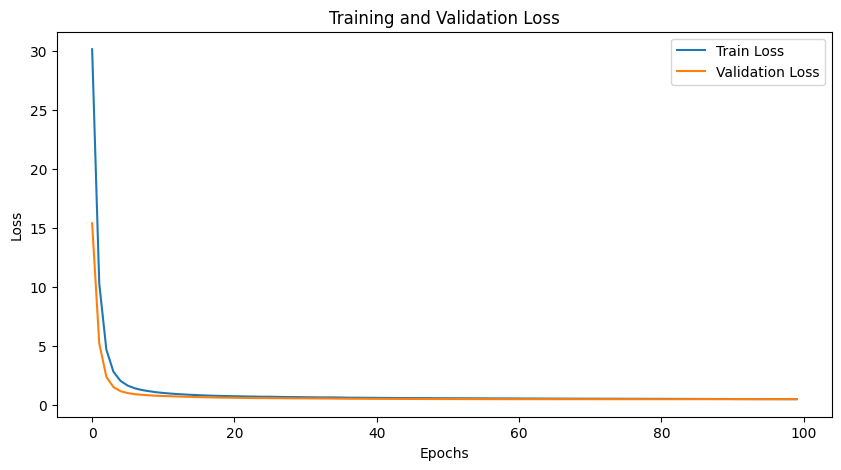

In [ ]:
import matplotlib.pyplot as plt

train_losses, valid_losses = train_model(model, train_loader, valid_loader, criterion, optimizer, 100)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_test_loss = 0
    total_correct = 0
    with torch.no_grad():
        for sequences, targets in test_loader:
            outputs = model(sequences)
            loss = criterion(outputs, targets)
            total_test_loss += loss.item() * sequences.size(0)

    avg_test_loss = total_test_loss / len(test_loader.dataset)
    print(f'Test Loss: {avg_test_loss:.4f}')
    return avg_test_loss

print(evaluate_model(model, test_loader, criterion))

Test Loss: 0.3371
0.3371174391727651


In [ ]:
# If using CNN-LSTM model, run from here

import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvLSTM_Model(nn.Module):
    def __init__(self, input_channels, hidden_size, output_size, seq_length, input_size):
        super(ConvLSTM_Model, self).__init__()
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        # Define convolutional layers
        self.conv1 = nn.Conv2d(input_channels, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # LSTM layer, where we now input the flattened output of the conv layers
        self.lstm = nn.LSTM(32 * 2 * 2, hidden_size, batch_first=True)

        # Linear layer that maps from hidden state space to output space
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x should be in shape (batch, seq, channels, height, width)
        # Apply convolutions per sequence element
        batch_size, seq_len, C, H, W = x.size()
        c_in = x.view(batch_size * seq_len, C, H, W)
        c_out = F.relu(self.conv1(c_in))
        c_out = F.relu(self.conv2(c_out))
        c_out = self.pool(c_out)

        # Prepare output from conv layers for LSTM
        #r_in = c_out.view(batch_size, seq_len, 32 * 2 * 2)
        r_in = c_out.reshape(batch_size, seq_len, 32 * 2 * 2)

        # Pass the output of the conv layers to the LSTM
        lstm_out, (h_n, c_n) = self.lstm(r_in)
        last_hidden_state = h_n[0]

        # Pass the output of the LSTM to the linear layer
        x = self.linear(last_hidden_state)
        x = x.view(-1, 5, 5)  # Reshape the output to 5x5

        return x

In [ ]:
model_CNN_LSTM = ConvLSTM_Model(3, 50, 25, 6, [5, 5])

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=0.001)

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    # Lists to store loss per epoch
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        total_train_loss = 0

        model.train()  # Reset to training mode

        # Training loop
        for sequences, targets in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(sequences)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update model parameters
            total_train_loss += loss.item() * sequences.size(0)  # Multiply by batch size

        avg_train_loss = total_train_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)  # Append average loss for epoch

        # Validation loop
        model.eval()  # Set the model to evaluation mode
        total_val_loss = 0
        with torch.no_grad():  # No need to track grad during validation
            for sequences, targets in val_loader:
                outputs = model(sequences)
                loss = criterion(outputs, targets)
                total_val_loss += loss.item() * sequences.size(0)  # Multiply by batch size

        avg_val_loss = total_val_loss / len(val_loader.dataset)
        val_losses.append(avg_val_loss)  # Append average loss for epoch

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses

Epoch [1/50], Train Loss: 26.8290, Val Loss: 13.6237
Epoch [2/50], Train Loss: 9.8930, Val Loss: 5.3577
Epoch [3/50], Train Loss: 4.8981, Val Loss: 2.7007
Epoch [4/50], Train Loss: 3.1355, Val Loss: 1.8499
Epoch [5/50], Train Loss: 2.4142, Val Loss: 1.4373
Epoch [6/50], Train Loss: 1.9501, Val Loss: 1.1821
Epoch [7/50], Train Loss: 1.7014, Val Loss: 1.0537
Epoch [8/50], Train Loss: 1.4803, Val Loss: 0.9627
Epoch [9/50], Train Loss: 1.3239, Val Loss: 0.9004
Epoch [10/50], Train Loss: 1.2145, Val Loss: 0.8488
Epoch [11/50], Train Loss: 1.1293, Val Loss: 0.8475
Epoch [12/50], Train Loss: 1.0716, Val Loss: 0.8489
Epoch [13/50], Train Loss: 1.0067, Val Loss: 0.8201
Epoch [14/50], Train Loss: 0.9614, Val Loss: 0.7639
Epoch [15/50], Train Loss: 0.9161, Val Loss: 0.7531
Epoch [16/50], Train Loss: 0.8905, Val Loss: 0.7367
Epoch [17/50], Train Loss: 0.8554, Val Loss: 0.7148
Epoch [18/50], Train Loss: 0.8211, Val Loss: 0.6947
Epoch [19/50], Train Loss: 0.7978, Val Loss: 0.6807
Epoch [20/50], Trai

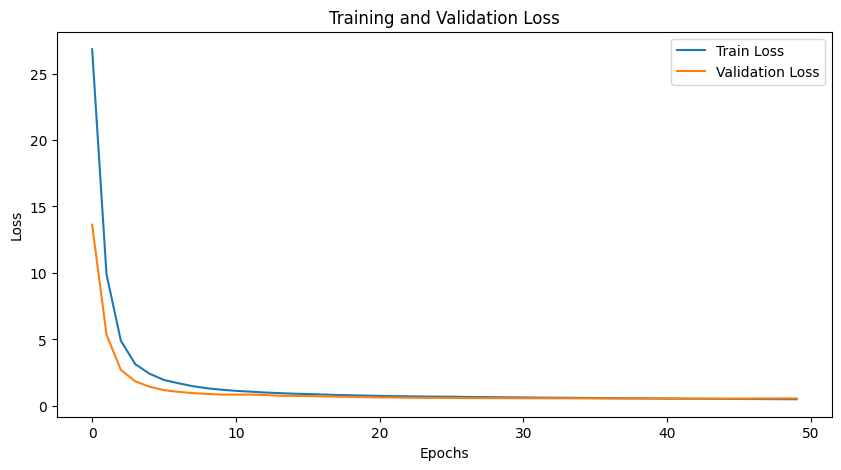

In [ ]:
import matplotlib.pyplot as plt

train_losses, valid_losses = train_model(model_CNN_LSTM, train_loader, valid_loader, criterion, optimizer, 50)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_test_loss = 0
    total_correct = 0
    output_export = []
    target_export = []
    with torch.no_grad():
        for sequences, targets in test_loader:
            outputs = model(sequences)
            output_export.append(outputs)
            target_export.append(targets)
            loss = criterion(outputs, targets)
            total_test_loss += loss.item() * sequences.size(0)

    avg_test_loss = total_test_loss / len(test_loader.dataset)
    print(f'Test Loss: {avg_test_loss:.4f}')
    return avg_test_loss, output_export, target_export

avg_test_loss, output_export, target_export = evaluate_model(model_CNN_LSTM, test_loader, criterion)

Test Loss: 0.4222


In [ ]:
import os

# Path to save the model in Google Drive
folder_path = '/content/drive/MyDrive/CS 663 - Project/'
model_path = os.path.join(folder_path, 'CNN_LSTM_model_Chicago.pth')

# Create the folder if it does not exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [ ]:
torch.save(model_CNN_LSTM.state_dict(), model_path)

In [ ]:
last_hour_o = output_export[-1][-1, :, :].numpy()

In [ ]:
last_hour_t = target_export[-1][-1, :, :].numpy()

In [ ]:
diff_last = abs(last_hour_o - last_hour_t)
diff_last

array([[1.0828848 , 1.050487  , 1.0531712 , 0.8244381 , 0.6898756 ],
       [1.336822  , 1.1390276 , 1.1318879 , 0.92730665, 0.33526373],
       [1.3465376 , 1.0777621 , 0.93762445, 0.88825226, 0.52233934],
       [1.5478339 , 1.3871002 , 2.026165  , 2.1802816 , 1.4125967 ],
       [2.2673373 , 2.4507504 , 2.8576756 , 1.912344  , 0.65805435]],
      dtype=float32)

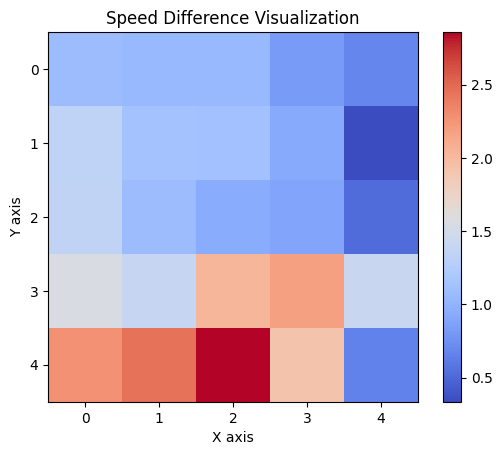

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the array
plt.imshow(diff_last, cmap='coolwarm')  # 'cmap' specifies the color map

# Adding a colorbar
plt.colorbar()

# Adding titles and labels (optional)
plt.title('Speed Difference Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Show the plot
plt.show()

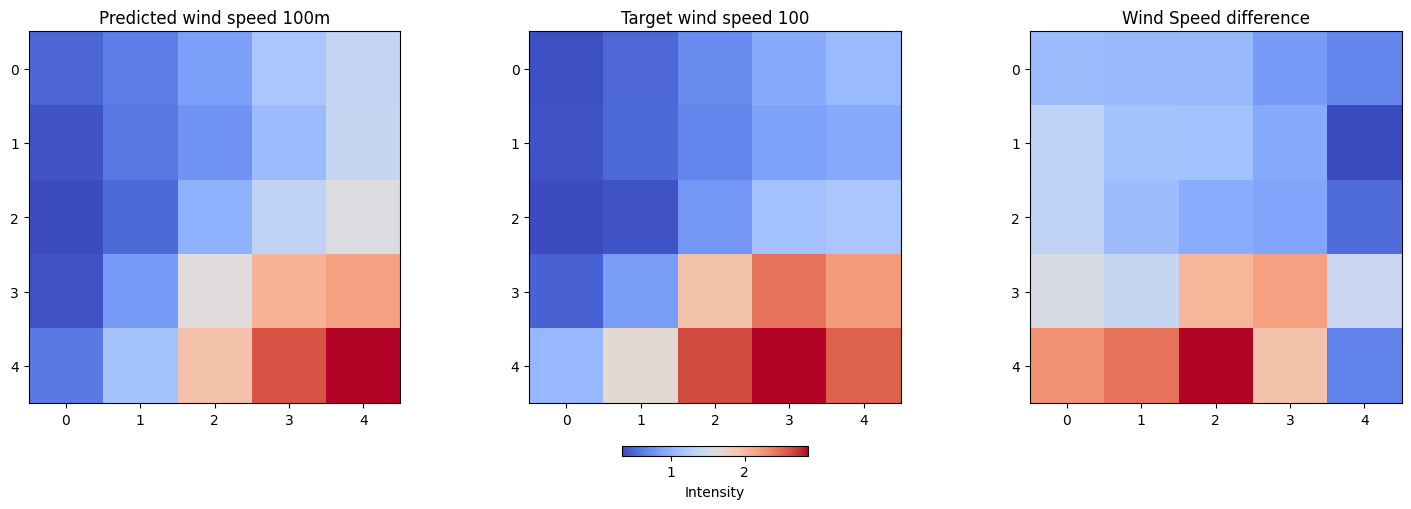

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Create a subplot grid of 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# List of arrays and axes for easier iteration
arrays = [last_hour_o, last_hour_t, diff_last]
titles = ['Predicted wind speed 100m', 'Target wind speed 100', 'Wind Speed difference']

for ax, arr, title in zip(axs, arrays, titles):
    # Create the image object with the same normalization
    img = ax.imshow(arr, cmap='coolwarm')
    ax.set_title(title)

# Create a colorbar with the same color scale
cbar = fig.colorbar(img, ax=axs, orientation='horizontal', fraction=0.025, pad=0.05)
cbar.set_label('Intensity')

# Display the plot
plt.show()


In [ ]:
model_CNN_LSTM

ConvLSTM_Model(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lstm): LSTM(128, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=25, bias=True)
)